
#     **Building Model For Character Recognition Using Deep Learning**


######      Student Name --> Priyanshu Goyal

######      Section --> A

######      University Roll No --> 2014787

### **Importing the necessary libraries, packages**

In [1]:
import numpy as np                 # for scientific computation
import pandas as pd                # to manipulate, analyse the dataset
import tensorflow as tf            # to create deep learning models
from tensorflow import keras       # for developing, evaluating models
import matplotlib.pyplot as plt    # for graphical plotting and visualization                                                                     
import seaborn as sb               # for different visualization of the data
from keras.utils import np_utils   # to provide different utilities    

### **Loading the csv digit and letter datasets into dataframes**

In [2]:
#  loading the csv datasets into dataframes
train_digit_data = pd.read_csv("/content/drive/MyDrive/mnist_train.csv")      # training data for digits  
test_digit_data = pd.read_csv("/content/drive/MyDrive/mnist_test.csv")        # testing data for digits
letter_data = pd.read_csv("/content/drive/MyDrive/A_Z Handwritten Data.csv")  # dataset of letters - have to split it 

### **Joining train and test data of digit dataset to get complete digit dataset**

In [3]:
digit_data = pd.concat([train_digit_data, test_digit_data], ignore_index = True)  # this combines digits - train and test data

### **Exploring the digits and letters datasets**

In [4]:
#  seeing the digit dataset
digit_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69996,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69997,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69998,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#  interpretation of above output - we can see that the digit dataset contains 70000 rows and 785 columns
#  means that there are total 70000 instances of images and each image is of a handwritten digit ( from 0 to 9 )
#  785 columns for each row means that 1st column denotes the class/label of the image meaning contains the digit no. (0 to 9) of which the image is
#  next 784 columns in each row is the size of each image in pixels --> 28 * 28 pixel image (as 28 * 28 = 784)

In [6]:
#  seeing the letter dataset
letter_data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
#  interpretation of above output - we can see that the letters dataset contains 372450 rows and 785 columns
#  means that there are total 372450 instances of images and each image is of a handwritten letter ( from 'A' to 'Z' )
#  785 columns for each row means that 1st column denotes the class/label of the image meaning contains the letter no. (0 to 25) of which the image is
#  next 784 columns in each row is the size of each image in pixels --> 28 * 28 pixel image (as 28 * 28 = 784)

In [8]:
#  check the shape of digit and letter dataset
print(f"Digits dataset shape : {digit_data.shape}")
print(f"Letters dataset shape : {letter_data.shape}\n")

Digits dataset shape : (70000, 785)
Letters dataset shape : (372450, 785)



In [9]:
#  above output means that there are total 70000, 372450 examples of images in digit and letter dataset respectively
#  and each image is of a handwritten digit/letter ( from 0 to 9 and from 'A' to 'Z' respectively )
#  785 columns for each row means that 1st column denotes the class/label of the image meaning contains the digit/letter no. of which the image is
#  next 784 columns in each row is the size of each image in pixels --> 28 * 28 pixel image (as 28 * 28 = 784)
#  and 28*28 means it is a grayscale image i.e. it has no RGB channels otherwise it would have shape 28*28*3

In [10]:
#  show a single example from the digit dataset
print(f"Digit Image Example : \n{digit_data.iloc[0, 1:].values}\n")  # iloc is used for indexing in a dataframe, .values shows the values in form of numpy array
print(f"Digit Label : {digit_data.iloc[0][0]}")  # for printing the label/class of the image

Digit Image Example : 
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247

In [11]:
#  above output shows values of a 28*28 --> 784 pixels image in form of a numpy array and its values are between 0 and 255 
#  also it shows that its corresponding label is 5 --> meaning the image is of digit 5

Text(0.5, 1.0, '\n\nLabel : 5')

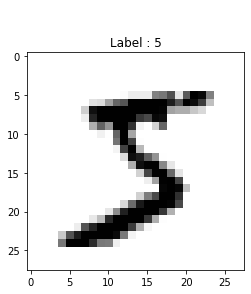

In [12]:
#  plotting the above example from digit dataset with its label

plt.imshow(digit_data.iloc[0, 1:].values.reshape(28, 28), cmap = plt.cm.binary)

#  imshow is used for plotting the image, iloc used for indexing in dataframe
#  reshape changes the flattened(having only one dimension) pixel matrix back into 28*28 image so we can plot and visualize it 
#  cm.binary changes the colour of image to black and white

plt.title(f"\n\nLabel : {digit_data.iloc[0, 0]}")  

#  making the label of image as title
#  0th col contains label for image and plotting the 1st example hence 0th row

Text(0.5, 1.0, '\n\nLabel : 0')

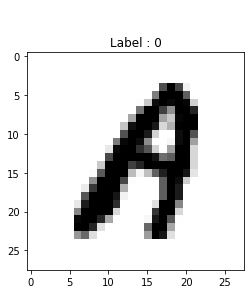

In [13]:
#  plotting an example from the letter dataset

plt.imshow(letter_data.iloc[0, 1:].values.reshape(28, 28), cmap = plt.cm.binary)
plt.title(f"\n\nLabel : {letter_data.iloc[0, 0]}")  

#  making the label of the image as title, using 0th column because it contains the label of the image, and 0th row because of 1st instance

Text(0.5, 1.0, '\n\nLabel : A')

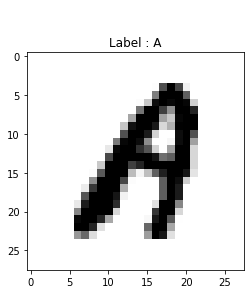

In [14]:
#  above output gives label for 'A' as 0 as labels are in numerical form from 0 to 25 for letters
#  as labels are in numerical form, for printing it in human readable form we add 65 to it (as 65 to 90 in char is 'A' to 'Z')

plt.imshow(letter_data.iloc[0, 1:].values.reshape(28, 28), cmap = plt.cm.binary)
plt.title(f"\n\nLabel : {chr(letter_data.iloc[0, 0] + 65)}")

In [15]:
#  see the counts of each label/class (0 to 9) in the digit dataset, label 0 is for digit 0, 1 for digit 1, ... 9 for digit 9 

print("Counts of labels in the digit dataset\n")
(digit_data['label'].value_counts()).sort_index(inplace = False)  

#  value_counts returns count of unique values, in this case labels
#  using 'label' as it's name of the 0th col which has labels

Counts of labels in the digit dataset



0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: label, dtype: int64

In [16]:
#  check counts of each label/class (0 to 25) in the letter dataset, label 0 is for letter 'A', 1 for letter 'B', ... 25 for letter 'Z' 

print("Counts of labels in the letters dataset\n")
(letter_data['0'].value_counts()).sort_index(inplace = False)  

#  value_counts returns count of unique values, in this case labels, using '0' as 0th col is for labels and its name is '0' in dataset

Counts of labels in the letters dataset



0     13869
1      8668
2     23409
3     10134
4     11440
5      1163
6      5762
7      7218
8      1120
9      8493
10     5603
11    11586
12    12336
13    19010
14    57825
15    19341
16     5812
17    11566
18    48419
19    22495
20    29008
21     4182
22    10784
23     6272
24    10859
25     6076
Name: 0, dtype: int64

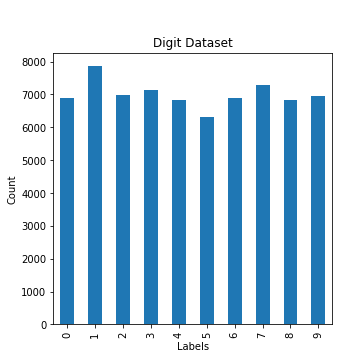

In [17]:
#  visualizing the above count of classes in each dataset using a bar plot for analysis

#  for digit dataset
plt.figure(figsize=(5, 5))  # set figure size
plt.xlabel( 'Labels')  # set x-axis
plt.ylabel('Count')  # set y-axis
plt.title('\n\nDigit Dataset')  # set title
digit_data['label'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # kind of plot is barplot 

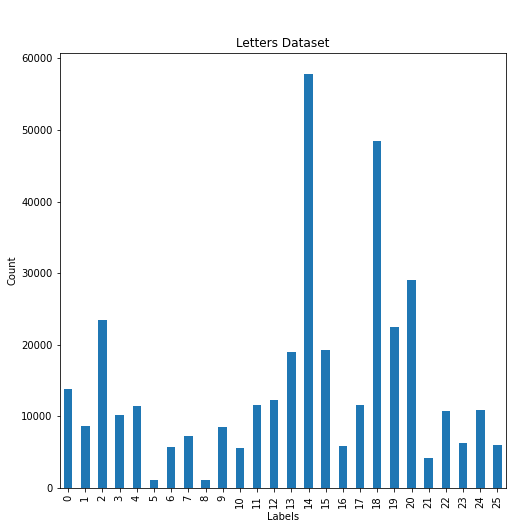

In [18]:
#  for letter dataset
plt.figure(figsize=(8, 8))
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("\n\nLetters Dataset")
letter_data['0'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # makes barplot

In [19]:
#  above barplots show that
#  the classes in digit dataset is balanced
#  but classes in letter dataset is unbalanced --> images of some letters are very high, and some are low --> this can affect our result badly
#  so we do resampling while preprocessing to handle it

### **Preprocessing the Data**

In [20]:
#  Renaming the 0th column of both dataset to 'label' (for easy understanding) as it contains labels for images

digit_data.rename(columns = {'0' : 'label'}, inplace = True)  # inplace makes cahnges to original dataset
letter_data.rename(columns = {'0' : 'label'}, inplace = True)

In [21]:
#  Resampling the dataset by taking 1000 samples of each class to make the classes balanced

digit_data = digit_data.groupby('label').head(1000)
letter_data = letter_data.groupby('label').head(1000)

In [22]:
#  checking the shape of datasets after resampling

print(f"Digit Data Shape : {digit_data.shape}\n")
print(f"Letter Data Shape : {letter_data.shape}")

Digit Data Shape : (10000, 785)

Letter Data Shape : (26000, 785)


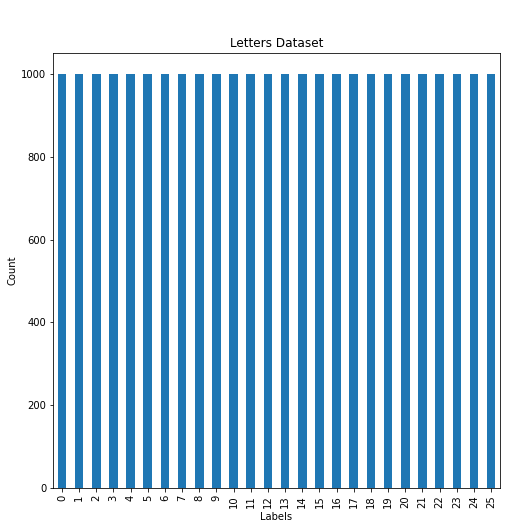

In [23]:
#  again plot bargraphs for datasets to check for balance between classes

#  for letter dataset
plt.figure(figsize=(8, 8))
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("\n\nLetters Dataset")
letter_data['label'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # makes barplot

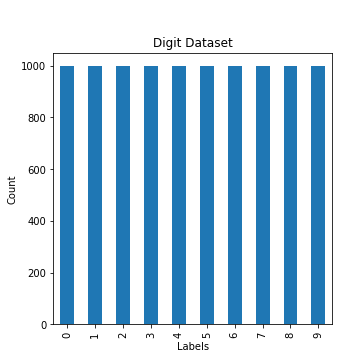

In [24]:
# for digit dataset
plt.figure(figsize=(5, 5))  # set figure size
plt.xlabel( 'Labels')  # set x-axis
plt.ylabel('Count')  # set y-axis
plt.title('\n\nDigit Dataset')  # set title
digit_data['label'].value_counts().sort_index(inplace = False).plot(kind = 'bar')  # kind of plot is barplot 

In [25]:
#  Splitting the datasets into features and Labels for both digits and letters
# X is for features, y is for labels

#  for digits
X_digit = digit_data.drop('label', axis = 1)    # means take all columns except the first col which contains labels
y_digit = digit_data['label']                     # takes only the 1st col which has labels for images

#  for letters
X_letter = letter_data.drop('label', axis = 1)
y_letter =   letter_data['label']                 # takes only the col of labels

In [26]:
#  now we split the data into training and test data

from sklearn.model_selection import train_test_split  # for splitting data into train and test

# for digits
X_train_dig, X_test_dig, y_train_dig, y_test_dig = train_test_split(X_digit, y_digit, test_size = 0.2)  # means 20% data goes into testing part, 80% for training

# for letters
X_train_let, X_test_let, y_train_let, y_test_let = train_test_split(X_letter, y_letter, test_size = 0.2)  # means 20% for test, 80% for training model 

In [27]:
#  we convert dataframe into numpy arrays for easy preprocessing, normalization

#  check type before conversion
print(f"Type before conversion : {type(X_train_dig)}\n")

X_train_dig = X_train_dig.to_numpy()  # to_numpy converts the dataframe into numpy array
X_test_dig = X_test_dig.to_numpy()
X_train_let = X_train_let.to_numpy()
X_test_let = X_test_let.to_numpy()

print(f"Type after conversion : {type(X_train_dig)}\n")

Type before conversion : <class 'pandas.core.frame.DataFrame'>

Type after conversion : <class 'numpy.ndarray'>



In [28]:
#  total we have 36 classes --> 10 for digits, 26 for letters but they are in numerical form in labels
#  so we make a list containing the actual label in a list

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
               'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

#  checking total classes
print(f"Total Classes : {len(class_names)}\n")

Total Classes : 36



In [29]:
#  As the labels of letters are from 0 to 25, but total classes are 36, 
#  so we add 10 to labels of letters to make them from 10 to 35 --> then from 0 to 9 labels are of digits, and from 10 to 35 labels are of letters 

y_train_let = y_train_let + 10
y_test_let = y_test_let + 10

In [30]:
#  till now the labels are in a single array
#  so we convert labels into one-hot encoding which removes the integer encoding 
#  and a new binary variable is added for each unique integer value

from tensorflow.keras.utils import to_categorical  # for converting into categorical data

print(f"shape before one-hot encoding{y_train_dig.shape}\n")

y_train_dig = to_categorical(y_train_dig, num_classes = 36)  # will create 36 columns for each class
y_test_dig = to_categorical(y_test_dig, num_classes = 36)    # and only one column will be true in each row corresponding to the image
y_train_let = to_categorical(y_train_let, num_classes = 36)
y_test_let = to_categorical(y_test_let, num_classes = 36)

print(f"shape after one-hot encoding{y_train_dig.shape}\n")

shape before one-hot encoding(8000,)

shape after one-hot encoding(8000, 36)



In [31]:
#  combining training and testing data from both datasets into a single dataset

X_train = np.concatenate((X_train_dig, X_train_let), axis = 0)  # concatenate merges the datasets which are in form of numpy array 
X_test  = np.concatenate((X_test_dig, X_test_let), axis = 0)
y_train = np.concatenate((y_train_dig, y_train_let), axis = 0)
y_test  = np.concatenate((y_test_dig, y_test_let), axis = 0)

In [32]:
#  normalize the features to reduce complexity of the model 
#  divide by max value of the features numpy array to get normalized data

print(f"before normalizing, max :, min : {X_train[0].max(), X_train[0].min()}\n")

#  as the pixel values are betweem 0 and 255, so max value becomes 255
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"after normalizing, max :, min : {X_train[0].max(), X_train[0].min()}\n")


before normalizing, max :, min : (255, 0)

after normalizing, max :, min : (1.0, 0.0)

